In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('/content/uber_df.csv')

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DateTime          48120 non-null  object
 1   Humidity          48120 non-null  int64 
 2   Temperature(C)    48120 non-null  int64 
 3   Wind Speed(Kmph)  48120 non-null  int64 
 4   Junction          48120 non-null  int64 
 5   Vehicles          48120 non-null  int64 
 6   ID                48120 non-null  int64 
 7   holiday           48120 non-null  object
 8   holiday_type      48120 non-null  object
dtypes: int64(6), object(3)
memory usage: 3.3+ MB


In [5]:
df= df.astype({"DateTime":'datetime64[ns]'})
df['Hour'] = df['DateTime'].dt.hour
df['Day_Of_Week'] = df['DateTime'].dt.dayofweek
df['Day_Of_Month'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateTime          48120 non-null  datetime64[ns]
 1   Humidity          48120 non-null  int64         
 2   Temperature(C)    48120 non-null  int64         
 3   Wind Speed(Kmph)  48120 non-null  int64         
 4   Junction          48120 non-null  int64         
 5   Vehicles          48120 non-null  int64         
 6   ID                48120 non-null  int64         
 7   holiday           48120 non-null  object        
 8   holiday_type      48120 non-null  object        
 9   Hour              48120 non-null  int32         
 10  Day_Of_Week       48120 non-null  int32         
 11  Day_Of_Month      48120 non-null  int32         
 12  Month             48120 non-null  int32         
 13  Year              48120 non-null  int32         
dtypes: datetime64[ns](1), 

#avg vehicle count for each hour across days

In [7]:
hourly_avg = df.groupby('Hour')['Vehicles'].mean().reset_index(name='Average_Vehicle_Count')

In [8]:
hourly_avg.head(24)

,Hour,Average_Vehicle_Count
0,0,22.621945
1,1,19.416459
2,2,17.080299
3,3,14.847382
4,4,12.973067
5,5,12.173566
6,6,12.980050
7,7,14.703242
8,8,16.381047
9,9,19.108728


#hour with highest congestion

In [9]:
hourly_avg.loc[hourly_avg['Average_Vehicle_Count'].idxmax()]

,19
Hour,19.000000
Average_Vehicle_Count,26.581047


#consistant peak hours across days

In [10]:
# Calculate the moving average with a window of 3 hours(average of last 2 hr and existing )
hourly_avg['MovingAvg'] = hourly_avg['Average_Vehicle_Count'].rolling(window=3, center=True).mean()

# Identify potential peak hours based on a percentile threshold(90 percentile i.e top 10% highest congestion )
hourly_avg.loc[hourly_avg['MovingAvg'] > hourly_avg['MovingAvg'].quantile(0.9),:]

,Hour,Average_Vehicle_Count,MovingAvg
19,19,26.581047,26.177722
20,20,26.579551,26.275145
21,21,25.664838,25.807315


#avg vehicle count for each hour across weeks

In [11]:
hourly_weekly_avg = df.groupby(['Hour','Day_Of_Week'])['Vehicles'].mean().reset_index(name='Average_Vehicle_Count')

In [12]:
hourly_weekly_avg.head(10)

,Hour,Day_Of_Week,Average_Vehicle_Count
0,0,0,20.687285
1,0,1,23.900356
2,0,2,23.216028
3,0,3,23.445230
4,0,4,23.668990
5,0,5,22.790210
6,0,6,20.731034
7,1,0,17.412371
8,1,1,20.921708
9,1,2,20.198606


#hour(weekly) with highest congestion

In [13]:
hourly_weekly_avg.loc[hourly_weekly_avg['Average_Vehicle_Count'].idxmax()]

,134
Hour,19.000000
Day_Of_Week,1.000000
Average_Vehicle_Count,28.017794


#consistant peak hours across weeks

In [14]:
# Calculate the moving average with a window of 3 hours(average of last 2 hr and existing )
hourly_weekly_avg['MovingAvg'] = hourly_weekly_avg['Average_Vehicle_Count'].rolling(window=3, center=True).mean()

# Identify potential peak hours based on a percentile threshold(95 percentile i.e top 5% highest congestion )
hourly_weekly_avg.loc[hourly_weekly_avg['MovingAvg'] > hourly_weekly_avg['MovingAvg'].quantile(0.95),:]

,Hour,Day_Of_Week,Average_Vehicle_Count,MovingAvg
85,12,1,27.430605,27.107443
106,15,1,27.209964,27.051545
107,15,2,26.724739,27.012392
134,19,1,28.017794,27.637555
135,19,2,27.351916,27.701564
136,19,3,27.734982,27.256609
141,20,1,27.676157,27.443301
142,20,2,27.310105,27.497187
143,20,3,27.505300,26.982603


Peak hours variation between weekdays and weekends

In [15]:
# for weekday
a=hourly_weekly_avg.loc[~hourly_weekly_avg['Day_Of_Week'].isin([5,6]),:]
a.loc[a['MovingAvg'] > a['MovingAvg'].quantile(0.95),:]


,Hour,Day_Of_Week,Average_Vehicle_Count,MovingAvg
85,12,1,27.430605,27.107443
134,19,1,28.017794,27.637555
135,19,2,27.351916,27.701564
136,19,3,27.734982,27.256609
141,20,1,27.676157,27.443301
142,20,2,27.310105,27.497187


In [16]:
# for weekends
b=hourly_weekly_avg.loc[hourly_weekly_avg['Day_Of_Week'].isin([5,6]),:]
b.loc[b['MovingAvg'] > b['MovingAvg'].quantile(0.95),:]
#peak hours for weekdays and weekends are similar(19,20)
#12,15 peakhours for weekdays only

,Hour,Day_Of_Week,Average_Vehicle_Count,MovingAvg
139,19,6,23.486207,25.380346
145,20,5,26.241259,25.424554
146,20,6,23.900000,25.608369


#monthly and seasonal variation in peak hours

In [17]:
#addition of season column
d={1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'}
df['Season'] = df['DateTime'].dt.month.map(d)

In [18]:
monthly_hourly_avg = df.groupby(['Month', 'Hour'])['Vehicles'].mean().reset_index(name='Average_Vehicle_Count')
# Calculate the moving average with a window of 3 hours(average of last 2 hr and existing )
monthly_hourly_avg['MovingAvg'] = monthly_hourly_avg['Average_Vehicle_Count'].rolling(window=3, center=True).mean()
monthly_peak_hours = monthly_hourly_avg[monthly_hourly_avg['MovingAvg'] > monthly_hourly_avg.groupby('Month')['MovingAvg'].transform('quantile', 0.9)]

In [19]:
print("Monthly Peak Hours:\n", monthly_peak_hours)
#19,20,21 remains peak hours for all months(i.e it dose not varry with months)


Monthly Peak Hours:
      Month  Hour  Average_Vehicle_Count  MovingAvg
19       1    19              23.839196  23.628141
20       1    20              24.452261  24.107203
21       1    21              24.030151  24.080402
43       2    19              26.287293  25.843462
44       2    20              26.243094  26.123389
45       2    21              25.839779  25.887661
67       3    19              26.301508  25.857621
68       3    20              26.140704  25.862647
91       4    19              27.843750  27.593750
92       4    20              28.369792  27.928819
93       4    21              27.572917  27.423611
114      5    18              26.115578  25.934673
115      5    19              26.834171  26.648241
116      5    20              26.994975  26.435511
138      6    18              27.843750  27.907986
139      6    19              28.625000  28.177083
140      6    20              28.062500  27.729167
162      7    18              27.219512  26.905149
163      7

In [21]:
seasonal_hourly_avg = df.groupby(['Season', 'Hour'])['Vehicles'].mean().reset_index(name='Average_Vehicle_Count')
# Apply moving average to seasonal data
seasonal_hourly_avg['MovingAvg'] = seasonal_hourly_avg['Average_Vehicle_Count'].rolling(window=3, center=True).mean()
seasonal_peak_hours = seasonal_hourly_avg[seasonal_hourly_avg['MovingAvg'] > seasonal_hourly_avg.groupby('Season')['MovingAvg'].transform('quantile', 0.9)]


In [22]:
print("\nSeasonal Peak Hours:\n", seasonal_peak_hours)
#19,20,21 remains peak hours for all months(i.e it dose not varry with seasons)


Seasonal Peak Hours:
     Season  Hour  Average_Vehicle_Count  MovingAvg
19  Autumn    19              27.426859  26.888889
20  Autumn    20              27.446043  27.087130
21  Autumn    21              26.388489  26.625100
43  Spring    19              26.983051  26.689266
44  Spring    20              27.154237  26.728249
45  Spring    21              26.047458  26.140678
66  Summer    18              27.006849  26.987062
67  Summer    19              28.070776  27.577626
68  Summer    20              27.655251  27.366058
91  Winter    19              24.362500  24.014286
92  Winter    20              24.487500  24.339881
93  Winter    21              24.169643  24.192857


Quantify the influance of weather data and special event on peak hours

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateTime          48120 non-null  datetime64[ns]
 1   Humidity          48120 non-null  int64         
 2   Temperature(C)    48120 non-null  int64         
 3   Wind Speed(Kmph)  48120 non-null  int64         
 4   Junction          48120 non-null  int64         
 5   Vehicles          48120 non-null  int64         
 6   ID                48120 non-null  int64         
 7   holiday           48120 non-null  object        
 8   holiday_type      48120 non-null  object        
 9   Hour              48120 non-null  int32         
 10  Day_Of_Week       48120 non-null  int32         
 11  Day_Of_Month      48120 non-null  int32         
 12  Month             48120 non-null  int32         
 13  Year              48120 non-null  int32         
 14  Season            4812

In [24]:
# Define features
df_ex= df[['Humidity','Temperature(C)','Wind Speed(Kmph)','holiday_type','Vehicles']]
df_ex=pd.get_dummies(df_ex)
correlation_matrix = df_ex.corr()



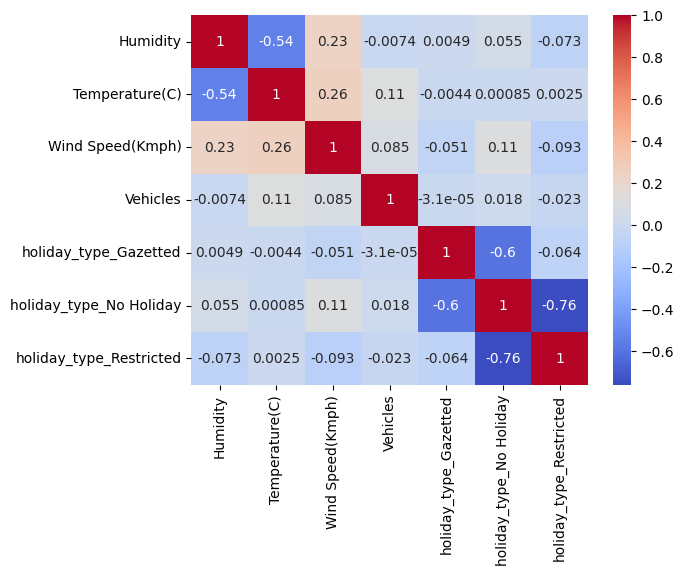

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [26]:
# Correlation with target variable
target_correlation = correlation_matrix['Vehicles'].abs().sort_values(ascending=False)
print(target_correlation)
# both event and weather have low effect on peak hour

Vehicles                   1.000000
Temperature(C)             0.114878
Wind Speed(Kmph)           0.084817
holiday_type_Restricted    0.022593
holiday_type_No Holiday    0.018161
Humidity                   0.007384
holiday_type_Gazetted      0.000031
Name: Vehicles, dtype: float64


## Average trafic volume across month and hour

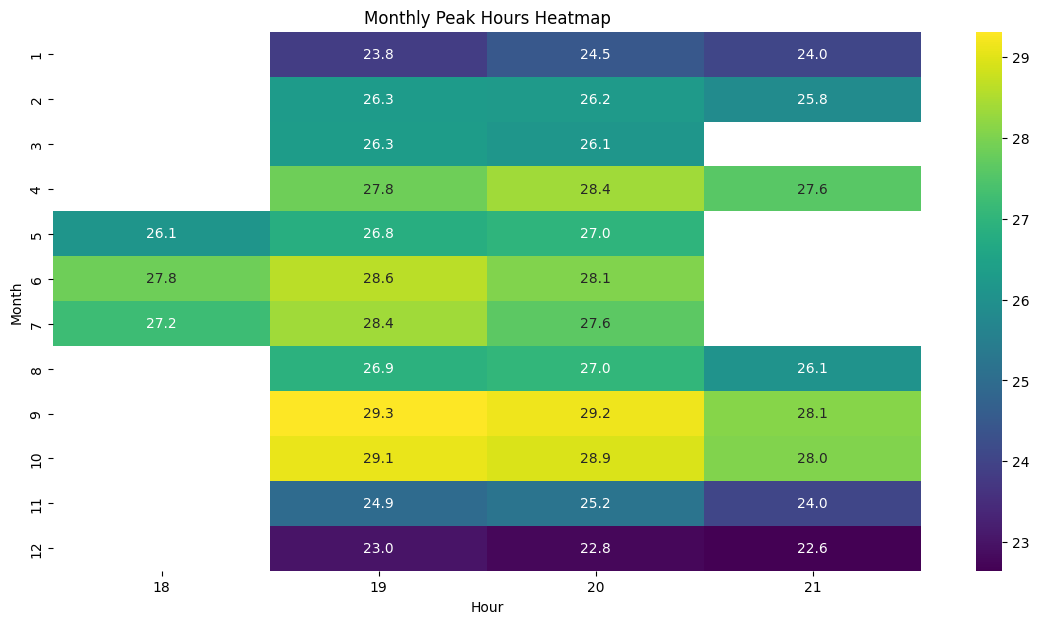

In [27]:
monthly_peak_hours_pivot = monthly_peak_hours.pivot(index='Month', columns='Hour', values='Average_Vehicle_Count')
plt.figure(figsize=(14, 7))
sns.heatmap(monthly_peak_hours_pivot, cmap='viridis', annot=True, fmt=".1f")
plt.title('Monthly Peak Hours Heatmap')
plt.xlabel('Hour')
plt.ylabel('Month')
plt.show()

## Average trafic volume disribution vs hour for each week day

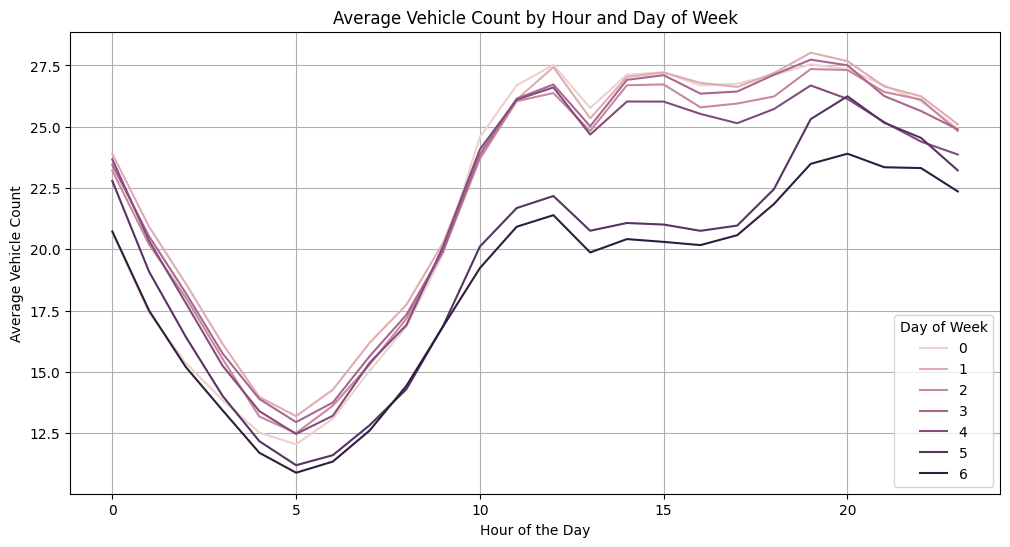

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Average_Vehicle_Count', hue='Day_Of_Week', data=hourly_weekly_avg)
plt.title('Average Vehicle Count by Hour and Day of Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Vehicle Count')
plt.grid(True)
plt.legend(title='Day of Week')
plt.show()

#effect of external factors on trafic volume

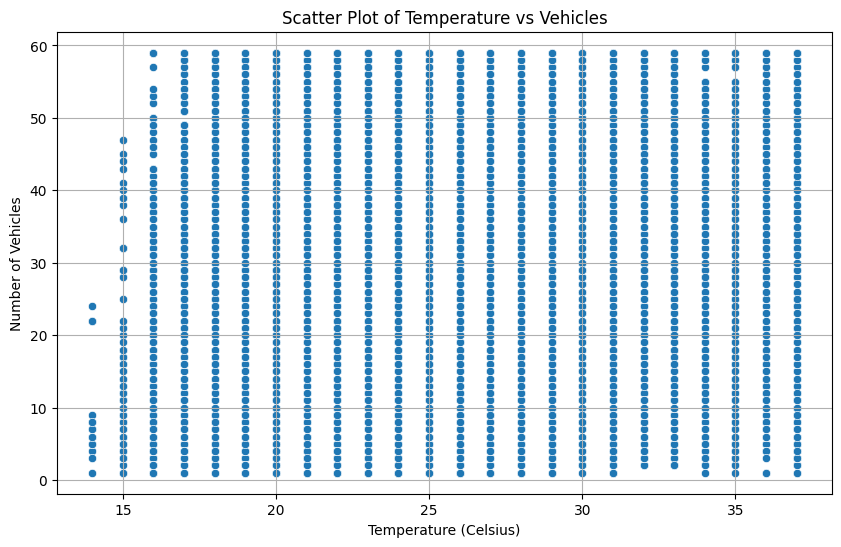

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(C)', y='Vehicles', data=df)
plt.title('Scatter Plot of Temperature vs Vehicles')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()
#their no correlation between temperature and vehicle volume

#junctionwise analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateTime          48120 non-null  datetime64[ns]
 1   Humidity          48120 non-null  int64         
 2   Temperature(C)    48120 non-null  int64         
 3   Wind Speed(Kmph)  48120 non-null  int64         
 4   Junction          48120 non-null  int64         
 5   Vehicles          48120 non-null  int64         
 6   ID                48120 non-null  int64         
 7   holiday           48120 non-null  object        
 8   holiday_type      48120 non-null  object        
 9   Hour              48120 non-null  int32         
 10  Day_Of_Week       48120 non-null  int32         
 11  Day_Of_Month      48120 non-null  int32         
 12  Month             48120 non-null  int32         
 13  Year              48120 non-null  int32         
 14  Season            4812

In [70]:
#Create four dataframe for each junction
df_1 = df[df['Junction'] == 1]
df_2 = df[df['Junction'] == 2]
df_3 = df[df['Junction'] == 3]
df_4 = df[df['Junction'] == 4]

In [31]:
df_1.shape,df_2.shape,dF_3.shape,df_4.shape

((14592, 15), (14592, 15), (14592, 15), (4344, 15))

#junctionwise daily analysis

In [53]:
hourlyjunctionwise_avg = df.groupby(['Junction','Hour'])['Vehicles'].mean().reset_index(name='Average_Vehicle_Count')
hourlyjunctionwise_avg.head(5)

,Junction,Hour,Average_Vehicle_Count
0,1,0,42.879934
1,1,1,38.370066
2,1,2,33.833882
3,1,3,29.430921
4,1,4,25.654605


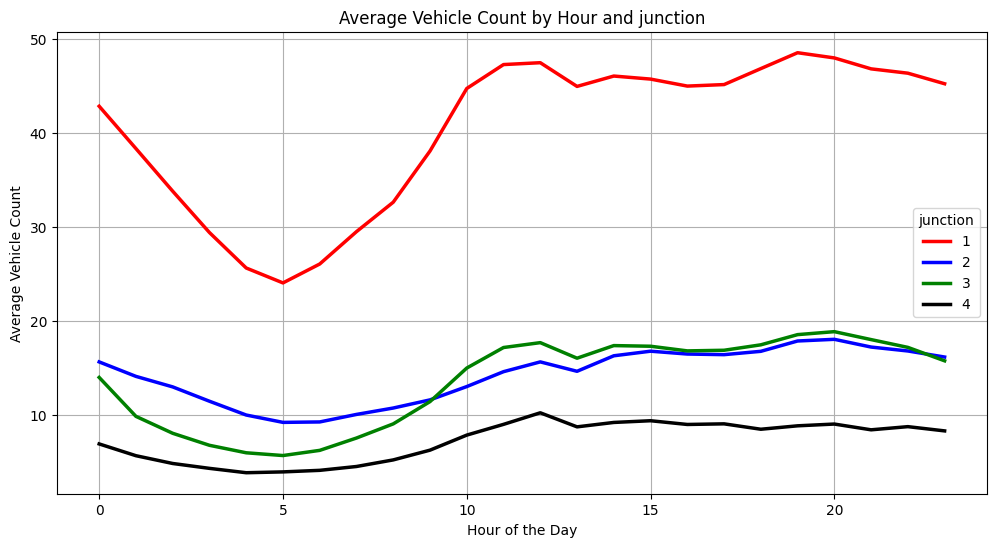

In [63]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Average_Vehicle_Count', hue='Junction', data=hourlyjunctionwise_avg,palette=['red', 'blue', 'green', 'black'], linewidth=2.5)
plt.title('Average Vehicle Count by Hour and junction')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Vehicle Count')
plt.grid(True)
plt.legend(title='junction')
plt.show()
#overall avg vehicle count for JUNCTION-1 is higher than other junctions combine
#lowest avg trafic volume for junction-1 is higher than the highest trafic average of any junction
#difference between average trafic volume for congestion hours and non-congestion hours is higher for junction-1 and junction_3
#difference between average trafic volume for congestion hours and non-congestion hours is lower for other junction


#junction wise weekdays & weekend analysis

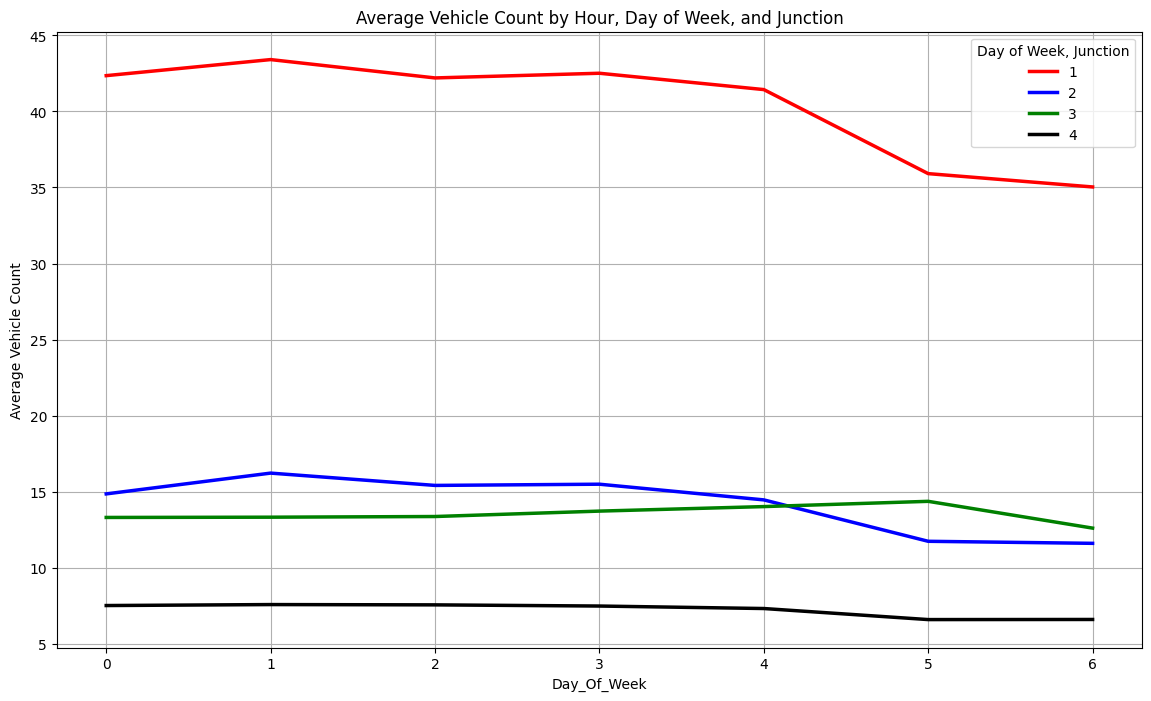

In [62]:
# Group the data by 'Day_Of_Week', 'Hour', and 'Junction' and calculate the mean 'Vehicles'
hourly_junction_weekly_avg = df.groupby(['Junction','Day_Of_Week'])['Vehicles'].mean().reset_index(name='Average_Vehicle_Count')

# Create a line plot using Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x='Day_Of_Week', y='Average_Vehicle_Count', hue='Junction',data=hourly_junction_weekly_avg,palette=['red', 'blue', 'green', 'black'], linewidth=2.5)
plt.title('Average Vehicle Count by Hour, Day of Week, and Junction')
plt.xlabel('Day_Of_Week')
plt.ylabel('Average Vehicle Count')
plt.grid(True)
plt.legend(title='Day of Week, Junction')
plt.show()
#for different days avg traffic remains approximatly same for junction_4
#for different days avg traffic remains approximatly same for junction_3 exept for increse on weekends
#for junction-1 as compair to weekdays traffic decreses by 25% for weekends but still higher than other junctions
#for junction-2 as compair to weekdays traffic decreses by 20% for weekends

#junction wise yearly analysis

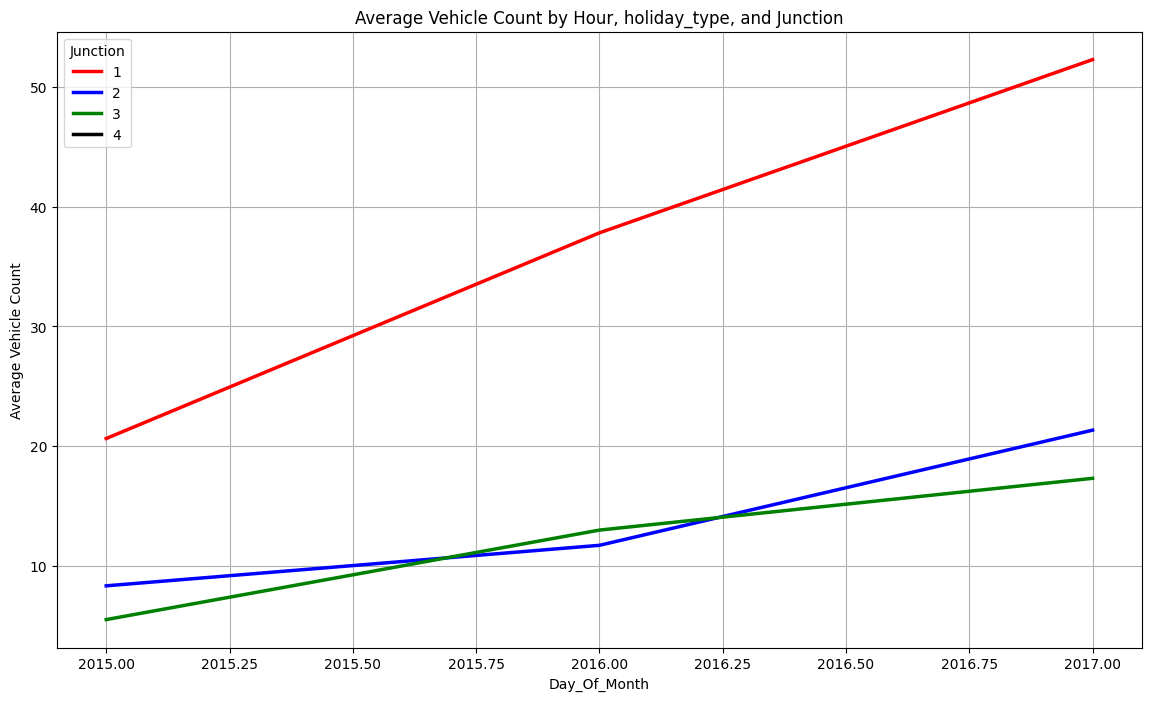

In [90]:
# Group the data by 'Day_Of_Week', 'Hour', and 'Junction' and calculate the mean 'Vehicles'
hourly_junction_weekly_avg = df.groupby(['Junction','Year'])['Vehicles'].mean().reset_index(name='Average_Vehicle_Count')

# Create a line plot using Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Average_Vehicle_Count', hue='Junction',data=hourly_junction_weekly_avg,palette=['red', 'blue', 'green', 'black'], linewidth=2.5)
plt.title('Average Vehicle Count by Hour, holiday_type, and Junction')
plt.xlabel('Day_Of_Month')
plt.ylabel('Average Vehicle Count')
plt.grid(True)
plt.legend(title='Junction')
plt.show()
#with years overall traffic increase by 150% for junction_1 and growth rate is almost uniform throwout years
#with years overall traffic increase by 150% for junction_2 and growth rate is double from 40% to 80% between 2015-16 and 2016-17
#with years overall traffic increase by 200% for junction_3 and growth rate is quatered from 130% to 30% between 2015-16 and 2016-17
#only 2017 data is avialabel for junction_4

#Finding influencing factors for each juction

In [97]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [101]:
df_s= pd.read_csv('/content/Integrated_Dataset.csv')

In [102]:
#Convert DateTime from object type to datetime64[ns] type
df_s = df_s.astype({"DateTime":'datetime64[ns]'})

#Create feature 'Hour_of_day' and 'Day_Of_Week' from DateTime for each junction
df_s['Hour_of_day'] = df_s['DateTime'].dt.hour
df_s['Day_Of_Week'] = df_s['DateTime'].dt.dayofweek
df_s['Day_Of_Month'] = df_s['DateTime'].dt.day
df_s['Month'] = df_s['DateTime'].dt.month
df_s['Year'] = df_s['DateTime'].dt.year

<ipython-input-102-88067fdf1783>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_s = df_s.astype({"DateTime":'datetime64[ns]'})


In [109]:
df_s.shape

(48120, 63)

junction_1

In [104]:
X=df_s.drop(['Vehicles','ID','DateTime'], axis=1)
Y=df_s['Vehicles']

In [110]:
regressor=DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=0, splitter='best')
rfe = RFE(regressor,n_features_to_select =1,step=4)


In [111]:
rfe.fit(X,Y)

RFE(estimator=DecisionTreeRegressor(random_state=0), n_features_to_select=1,
    step=4)

In [112]:
feature_tuple = tuple(zip(X.columns,rfe.ranking_))
sorted(feature_tuple, key = lambda x : x[1])
#factor like junction most important
#factors like Hour,Month,Year is second most important
#factors like Humidity,Wind Speed(Kmph),Day_Of_Week,Day_Of_Month is third most important
#other exernal factors are least important

[('Junction', 1),
 ('Hour_of_day', 2),
 ('Month', 2),
 ('Year', 2),
 ('Humidity', 3),
 ('Wind Speed(Kmph)', 3),
 ('Day_Of_Week', 3),
 ('Day_Of_Month', 3),
 ('Temperature(C)', 4),
 ("holiday_New Year's Day (R)", 4),
 ('holiday_No Special Event', 4),
 ('holiday_type_No Holiday', 4),
 ('holiday_Christmas Day (G)', 5),
 ('holiday_Independence day (G)', 5),
 ('holiday_type_Gazetted', 5),
 ('holiday_type_Restricted', 5),
 ('holiday_Bhai Duj (R)', 6),
 ('holiday_Buddha Purnima (G)', 6),
 ("holiday_Guru Rabindranath's Birthday (R)", 6),
 ('holiday_Ram Navami (R)', 6),
 ('holiday_Holika Dahan/Dolyatra (R)', 7),
 ("holiday_Mahatma Gandhi's Birthday (G)", 7),
 ('holiday_Onam or Thiru Onam Day (R)', 7),
 ('holiday_Swami Dayananda Saraswati Jayanti (R)', 7),
 ('holiday_Dussehra (G)', 8),
 ('holiday_Easter Sunday (R)', 8),
 ("holiday_Maharishi Valmiki's Birthday (R)", 8),
 ('holiday_Republic Day (G)', 8),
 ('holiday_Chaitra Sukladi/Gudi Padava/Ugadi/Cheti Chand (R)', 9),
 ("holiday_Gur'u Nanak's Bir